## Toronto Housing Price Prediction

### Step 1 : Define the Problem

##### To predict the Benchmark Price of a home in different GTA neighbourhoods using both composite and property-type–specific market indexes.

##### Column description
Location: Neighbourhood in Greater Toronto Area

CompIndex: Composite Index across all housing categories

CompBenchmark: Composite Benchmark across all housing categories (CDN Dollar)(Target)

CompYoYChange: Composite Year on Year Change across all housing categories

SFDetachIndex: Single Family Detach Index

SFDetachBenchmark: Single Family Detach Benchmark (CDN Dollar)

SFDetachYoYChange: Single Family Detach Year on Year Change

SFAttachIndex: Single Family Attach Index

SFAttachBenchmark: Single Family Attach Benchmark (CDN Dollar)

SFAttachYoYChange: Single Family Attach Year on Year Change

### Step 2 : Explore the Data

In [99]:
# Import all libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


In [100]:
#Loading the dataset
house=pd.read_csv("MLS.csv")

In [101]:
# First 5 rows of the dataset
house.head()

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
0,Adjala-Tosorontio,143.7,510000.0,12.00,143.7,510000.0,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-01
1,Adjala-Tosorontio,140.8,499700.0,13.82,140.8,499700.0,13.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-01
2,Adjala-Tosorontio,142.7,506400.0,15.83,142.7,506400.0,15.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-01
3,Adjala-Tosorontio,138.4,491100.0,11.08,138.4,491100.0,11.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-01
4,Adjala-Tosorontio,145.4,516000.0,16.51,145.4,516000.0,16.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-01


In [102]:
#Last 5 rows of the dataset
house.tail()

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
5086,York Region,287.0,970300.0,11.76,292.0,1112000.0,12.65,293.2,847300.0,12.73,271.3,704100.0,11.28,252.2,562700.0,6.91,2020-11-01
5087,York Region,289.5,978700.0,12.56,295.2,1124200.0,13.89,296.3,856200.0,13.66,270.4,701800.0,10.28,253.2,564900.0,6.84,2020-12-01
5088,York Region,294.9,997000.0,13.34,301.7,1148900.0,15.20,302.9,875300.0,14.78,272.6,707500.0,10.14,254.7,568200.0,5.86,2021-01-01
5089,York Region,309.9,1047700.0,17.16,318.6,1213300.0,20.23,322.6,932200.0,20.15,280.7,728500.0,11.04,260.2,580500.0,5.39,2021-02-01
5090,York Region,324.1,1095700.0,19.82,334.4,1273400.0,23.49,337.2,974400.0,22.48,294.0,763000.0,14.75,268.7,599500.0,6.00,2021-03-01


In [103]:
# Meta data information of the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 0 to 5090
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5091 non-null   object 
 1   CompIndex          5076 non-null   float64
 2   CompBenchmark      5076 non-null   float64
 3   CompYoYChange      5076 non-null   float64
 4   SFDetachIndex      5076 non-null   float64
 5   SFDetachBenchmark  5076 non-null   float64
 6   SFDetachYoYChange  5075 non-null   float64
 7   SFAttachIndex      4949 non-null   float64
 8   SFAttachBenchmark  4949 non-null   float64
 9   SFAttachYoYChange  4951 non-null   float64
 10  THouseIndex        3803 non-null   float64
 11  THouseBenchmark    3803 non-null   float64
 12  THouseYoYChange    3804 non-null   float64
 13  ApartIndex         4010 non-null   float64
 14  ApartBenchmark     4010 non-null   float64
 15  ApartYoYChange     4008 non-null   float64
 16  Date               5091 

In [104]:
# Statistical information of the dataset
house.describe()

,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange
count,5076.000000,5.076000e+03,5076.000000,5076.000000,5.076000e+03,5075.000000,4949.000000,4.949000e+03,4951.000000,3803.000000,3.803000e+03,3804.000000,4010.000000,4.010000e+03,4008.000000
mean,244.871592,7.720499e+05,10.222695,246.021277,9.481001e+05,9.329878,247.290139,7.182842e+05,9.311238,245.168393,5.829440e+05,9.466312,236.428279,4.838220e+05,11.521093
std,41.374120,2.725882e+05,9.186082,41.829704,3.765865e+05,10.411804,43.124667,2.433777e+05,10.105563,55.364090,2.212504e+05,14.473397,52.340839,1.457593e+05,9.079515
min,135.000000,2.570000e+05,-19.580000,126.000000,2.591000e+05,-21.320000,137.200000,2.733000e+05,-100.000000,0.000000,0.000000e+00,-100.000000,106.000000,1.714000e+05,-10.600000
25%,217.600000,5.890000e+05,4.380000,220.300000,6.822000e+05,2.245000,220.700000,5.429000e+05,2.715000,210.500000,4.394500e+05,4.080000,196.625000,3.819250e+05,5.640000
50%,247.100000,7.265000e+05,9.390000,246.700000,8.734500e+05,8.540000,246.700000,6.716000e+05,8.760000,246.400000,5.550000e+05,9.630000,239.600000,4.776000e+05,9.740000
75%,270.500000,9.033000e+05,15.382500,272.000000,1.137150e+06,15.715000,269.900000,8.399000e+05,15.370000,278.300000,6.731000e+05,15.602500,272.200000,5.692500e+05,15.290000
max,409.900000,2.162900e+06,46.780000,415.600000,2.536900e+06,49.100000,709.000000,1.677200e+06,43.710000,466.800000,1.750500e+06,56.490000,395.300000,1.005500e+06,64.320000


### Step 3 : Data Cleaning 

In [105]:
# Checking the null values
house.isnull().sum()

Location                0
CompIndex              15
CompBenchmark          15
CompYoYChange          15
SFDetachIndex          15
SFDetachBenchmark      15
SFDetachYoYChange      16
SFAttachIndex         142
SFAttachBenchmark     142
SFAttachYoYChange     140
THouseIndex          1288
THouseBenchmark      1288
THouseYoYChange      1287
ApartIndex           1081
ApartBenchmark       1081
ApartYoYChange       1083
Date                    0
dtype: int64

In [106]:
# Dropping the null values
house=house.dropna()

In [107]:
# Re-checking whether null values
house.isnull().sum()

Location             0
CompIndex            0
CompBenchmark        0
CompYoYChange        0
SFDetachIndex        0
SFDetachBenchmark    0
SFDetachYoYChange    0
SFAttachIndex        0
SFAttachBenchmark    0
SFAttachYoYChange    0
THouseIndex          0
THouseBenchmark      0
THouseYoYChange      0
ApartIndex           0
ApartBenchmark       0
ApartYoYChange       0
Date                 0
dtype: int64

In [108]:
# Checking for blank values
(house == ' ').sum()

Location             0
CompIndex            0
CompBenchmark        0
CompYoYChange        0
SFDetachIndex        0
SFDetachBenchmark    0
SFDetachYoYChange    0
SFAttachIndex        0
SFAttachBenchmark    0
SFAttachYoYChange    0
THouseIndex          0
THouseBenchmark      0
THouseYoYChange      0
ApartIndex           0
ApartBenchmark       0
ApartYoYChange       0
Date                 0
dtype: int64

In [109]:
# Convert the Date datatype to datetime 
house['Date'] = pd.to_datetime(house['Date']).map(lambda x: x.toordinal())

In [110]:
# Saving a copy of raw dataset
house_raw=house.copy()


In [111]:
# Encoding the Location into categorical variable 
house=pd.get_dummies(house,columns=['Location'],dtype=int)

In [112]:
house['CompBenchmark'] = pd.to_numeric(house['CompBenchmark'], errors='coerce')

In [113]:
house.columns = house.columns.str.strip() 

In [114]:
# Columns of the dataset
house.columns

Index(['CompIndex', 'CompBenchmark', 'CompYoYChange', 'SFDetachIndex',
       'SFDetachBenchmark', 'SFDetachYoYChange', 'SFAttachIndex',
       'SFAttachBenchmark', 'SFAttachYoYChange', 'THouseIndex',
       'THouseBenchmark', 'THouseYoYChange', 'ApartIndex', 'ApartBenchmark',
       'ApartYoYChange', 'Date', 'Location_Ajax', 'Location_Aurora',
       'Location_Brampton', 'Location_Burlington', 'Location_City of Toronto',
       'Location_Clarington', 'Location_Durham Region',
       'Location_Halton Hills', 'Location_Halton Region', 'Location_Markham',
       'Location_Milton', 'Location_Mississauga', 'Location_Newmarket',
       'Location_Oakville', 'Location_Oshawa', 'Location_Peel Region',
       'Location_Pickering', 'Location_Richmond Hill', 'Location_TREB Total',
       'Location_Toronto C01', 'Location_Toronto C02', 'Location_Toronto C04',
       'Location_Toronto C06', 'Location_Toronto C07', 'Location_Toronto C08',
       'Location_Toronto C09', 'Location_Toronto C10', 'Locat

In [115]:
house.head()

,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,...,Location_Toronto W05,Location_Toronto W06,Location_Toronto W07,Location_Toronto W08,Location_Toronto W09,Location_Toronto W10,Location_Vaughan,Location_Whitby,Location_Whitchurch-Stouffville,Location_York Region
69,179.8,444300.0,16.00,178.8,478900.0,17.86,187.1,402400.0,15.64,170.5,...,0,0,0,0,0,0,0,0,0,0
70,180.4,445800.0,16.31,179.2,480000.0,15.76,187.6,403500.0,16.81,170.4,...,0,0,0,0,0,0,0,0,0,0
71,182.8,451700.0,15.55,181.4,485800.0,15.10,190.1,408800.0,15.99,172.3,...,0,0,0,0,0,0,0,0,0,0
72,183.8,454200.0,15.74,182.3,488300.0,14.51,191.2,411200.0,15.95,177.1,...,0,0,0,0,0,0,0,0,0,0
73,182.1,450000.0,12.69,180.3,482900.0,11.99,190.3,409300.0,13.14,173.1,...,0,0,0,0,0,0,0,0,0,0


### Step 4 : Exploratory Data Analysis (EDA)

#### Correlation Heatmap

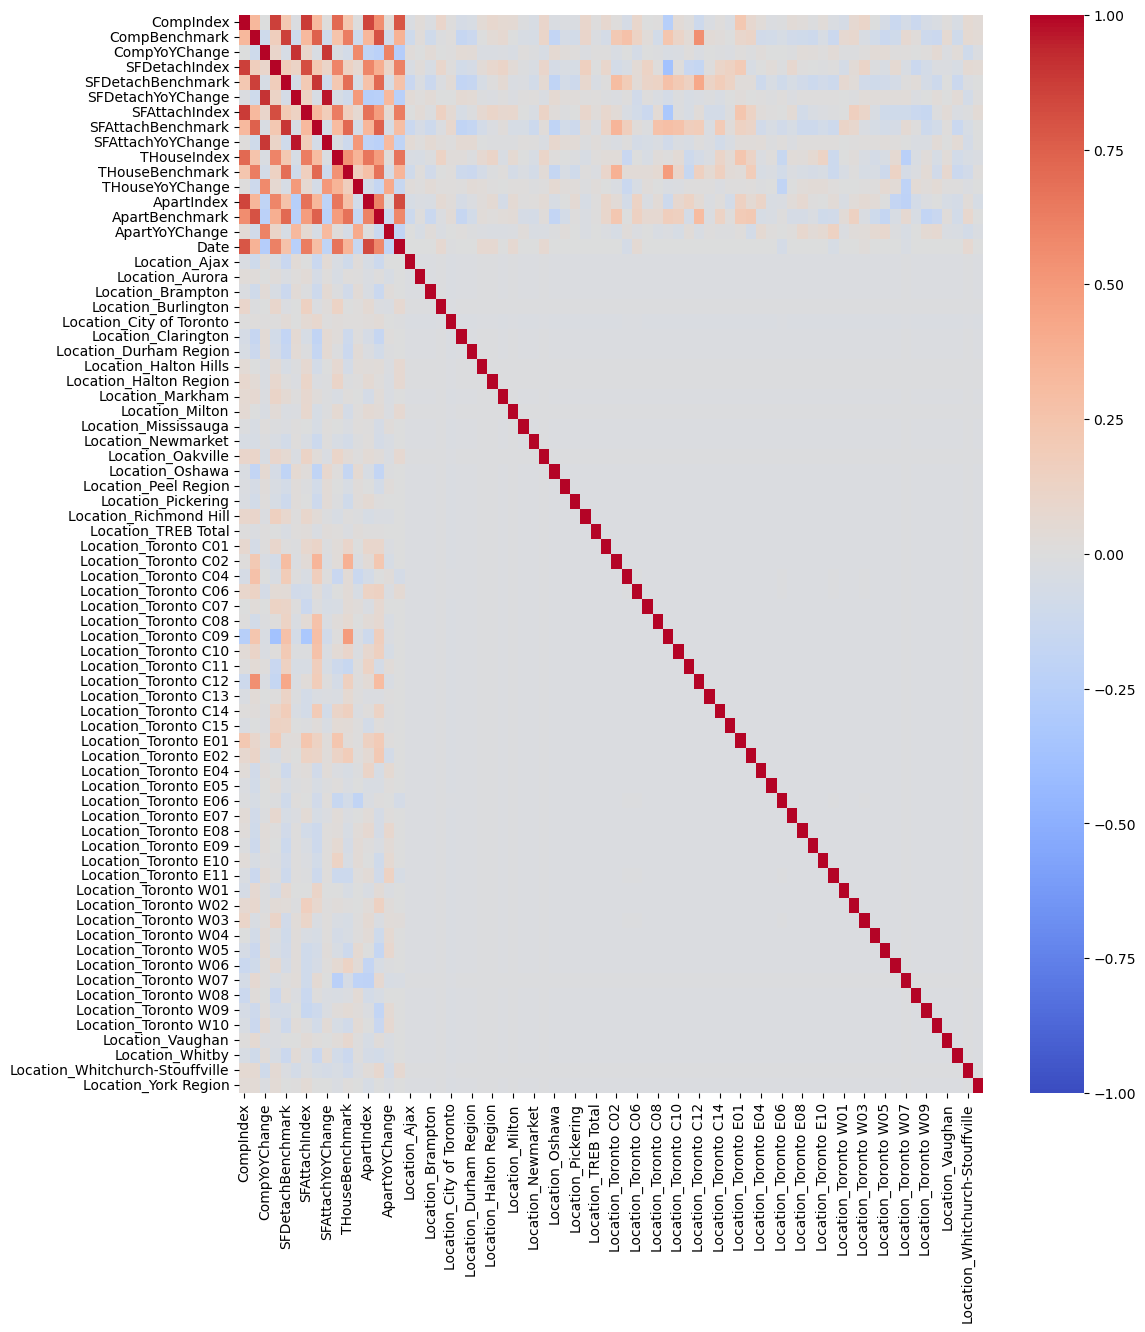

In [131]:
# Plotting correlation heatmap
plt.figure(figsize=(12,14))
sns.heatmap(house.corr(),cmap="coolwarm",vmin=-1.0, vmax=1.0)
plt.show()

### Positive Correlation
CompBenchmark ↔ SFDetachBenchmark

CompBenchmark ↔ SFAttachBenchmark

CompBenchmark ↔ ApartBenchmark

#### Scatter Plot for Price Vs Index

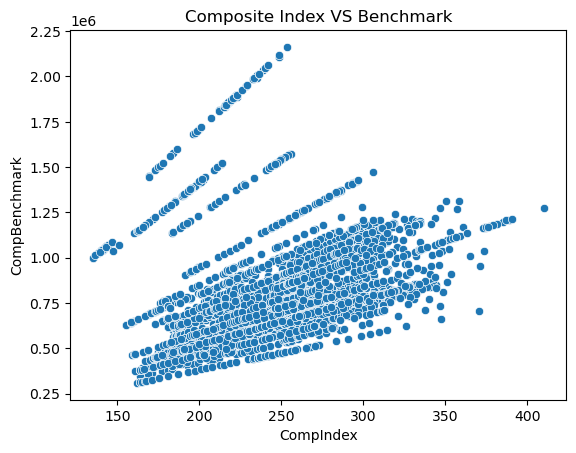

In [133]:
# Plotting the scatter plot for Price VS Index
sns.scatterplot(data=house_raw,x='CompIndex',y='CompBenchmark')
plt.title("Composite Index VS Benchmark")
plt.show()

* As CompIndex increases, CompBenchmark also increases. This means CompIndex strongly predicts house prices

#### Neighbourhood Benchmark Analysis

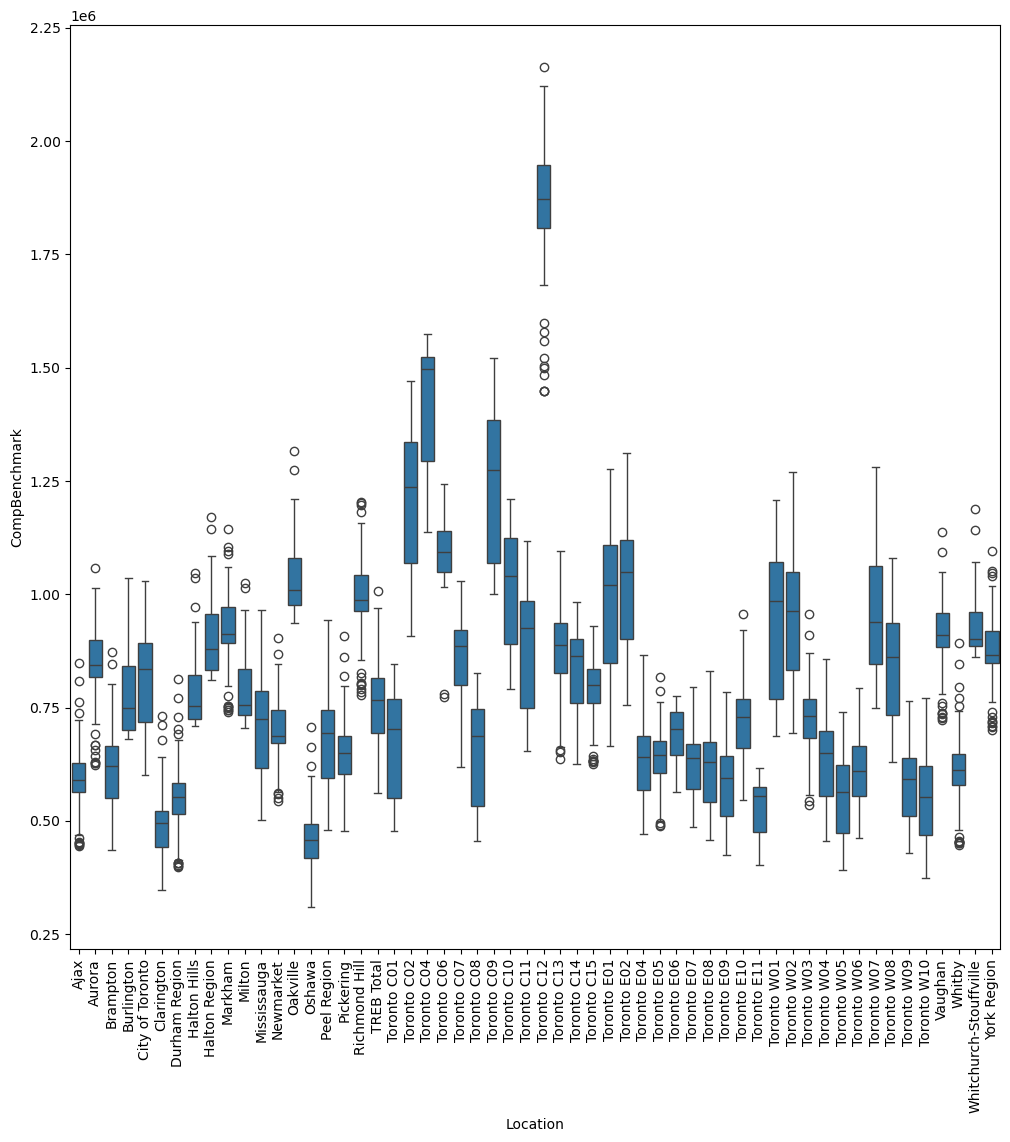

In [18]:
# Plotting boxplot for Neighbour Benchmark Analysis
plt.figure(figsize=(12,12))
sns.boxplot(data=house_raw, x='Location', y='CompBenchmark')
plt.xticks(rotation=90)
plt.show()

* Toronto C12 have high median.
* Oshawa have low median.

### Step 5 : Feature Engineering

In [19]:
# Price Gaps
house['DetachGap'] = house['SFDetachBenchmark'] - house['CompBenchmark']
house['AttachGap'] = house['SFAttachBenchmark'] - house['CompBenchmark']

In [20]:
# YoY Combined Impact
house['TotalYoY'] = house['CompYoYChange'] + house['SFDetachYoYChange'] + house['SFAttachYoYChange']

In [21]:
# Weighted Index Score
house['WeightedIndex'] = (house['CompIndex']*0.5 + house['SFDetachIndex']*0.3 + house['SFAttachIndex']*0.2)

### Step 6 : Split the data 

In [22]:
# Split the dataset into train set and test set
from sklearn.model_selection import train_test_split
X=house.drop('CompBenchmark',axis=1)
y=house['CompBenchmark']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 7 :Train the Models


#### Linear Regression

In [23]:
#Training and fitting the Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

##### Evaluate the model

In [24]:
# Evaluating the linear regression model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_pred=lr.predict(X_test)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)
print("Mean Square Error :",mse)
print("R² Score:", r_squared)
print("Root mean Square Error(RMSE) :",rmse)


Mean Absolute Error : 1.9847469725311208e-10
Mean Square Error : 6.863150539788032e-20
R² Score: 1.0
Root mean Square Error(RMSE) : 2.619761542543144e-10


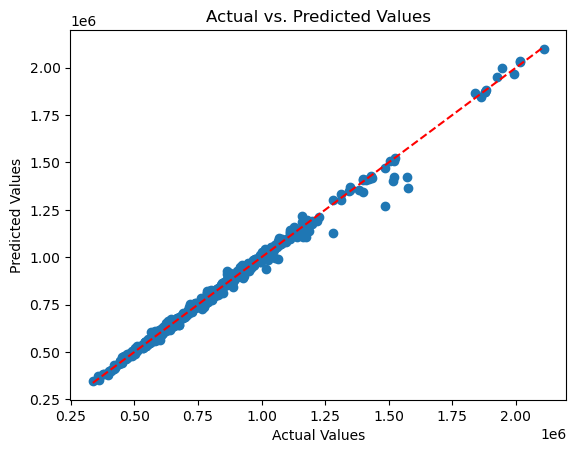

In [31]:
# Plotting the Actual Values VS Predicted Values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Ideal line
plt.show()

#### Random Forest Regression

In [25]:
# Training and fitting the Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

##### Evaluate the model

In [26]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_pred = rf.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Root mean Square Error(RMSE) :",rmse)
print("R²score:", r2)

Root mean Square Error(RMSE) : 17818.257891029072
R²score: 0.9953933665826663


### XGBoost Regression

In [27]:
#Training XGboost Regression Model
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

##### Evaluate the model

In [28]:
# Evaluating the model
y_pred = xgb.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)

RMSE: 20235.05489049086
R²: 0.9940589672475847


### Recommended Model
* Random Forest Regression Model is better model and it is recommended for this price prediction.
  

### Step 8 : Feature Importance

In [29]:
# Evaluating Feature Importance 
pd.Series(rf.feature_importances_, index=X.columns)\
  .sort_values(ascending=False).head(10)

SFDetachBenchmark       0.570217
AttachGap               0.260334
THouseBenchmark         0.051881
ApartBenchmark          0.033459
DetachGap               0.030721
SFAttachBenchmark       0.022373
CompIndex               0.012027
Date                    0.003987
SFDetachIndex           0.001890
Location_Toronto C04    0.001696
dtype: float64

### Next step
* Build an interactive dashboard in Power BI or Tableau
